In [ ]:
import networkx as nx 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import seaborn as sns
import json
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

df = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Saving State_region_mapping.csv to State_region_mapping.csv
display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.8,72.801854,3.2,61.647206,75.0,78.9,40.7,19.1,54.5,63.0,37.7
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,NaN,72.166525,4.5,62.148194,74.4,79.2,41.5,20.0,56.9,65.6,39.2
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.7,72.456395,6.8,62.723067,74.3,80.5,41.1,21.3,59.0,69.3,NaN
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.1,73.192821,8.4,63.619122,74.3,81.9,41.6,22.5,61.3,71.5,41.8
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.2,73.821142,NaN,65.088390,74.2,82.3,42.3,23.7,63.3,73.3,43.6


In [ ]:
df.isnull().sum().sort_values(ascending=False)

#1A) The 3 columns with highest missing values are BIOLOGY(6), COMPUTER SCIENCE(4), and ENGINEERING(5).

Biology                          6
Engineering                      5
Computer Science                 4
Social Sciences and History      1
Psychology                       1
Physical Sciences                1
Foreign Languages                1
Public Administration            1
Business                         0
Agriculture                      0
Architecture                     0
Art and Performance              0
Education                        0
Communications and Journalism    0
English                          0
Health Professions               0
Math and Statistics              0
Year                             0
dtype: int64

In [ ]:
new = (df['Biology'].isnull(), df['Year'])
new

#1B) The years that Biology is missing are 1998,  1999, 2000, 2001, 2002, 2003.

(0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28     True
 29     True
 30     True
 31     True
 32     True
 33     True
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 Name: Biology, dtype: bool, 0     1970
 1     1971
 2     1972
 3     1973
 4     1974
 5     1975
 6     1976
 7     1977
 8     1978
 9     1979
 10    1980
 11    1981
 12    1982
 13    1983
 14    1984
 15    1985
 16    1986
 17    1987
 18    1988
 19    1989
 20    1990
 21    1991
 22    1992
 23    1993
 24    1994
 25    1995
 26    1996
 27    1997
 28    1998
 29    1999
 30    2000
 31    2001
 32    2002
 33    2003
 34    2004
 35   

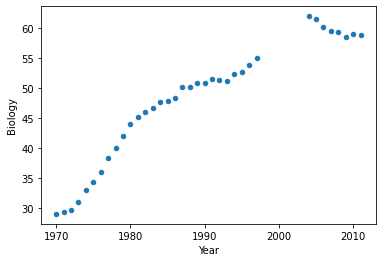

In [ ]:
df.plot.scatter(x='Year', y='Biology')
#1C)

In [ ]:
df.update(df.fillna(value=df.mean(), inplace=True))
df
#1D)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.600000,74.535328,0.8,65.570923,73.800000,77.1,38.0,13.800000,44.400000,68.40000,36.800000
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.600000,74.149204,1.0,64.556485,73.900000,75.5,39.0,14.900000,46.200000,65.50000,36.200000
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.900000,73.554520,1.2,63.664263,74.600000,76.9,40.2,14.800000,47.600000,62.60000,36.100000
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.400000,73.501814,1.6,62.941502,74.900000,77.4,40.9,16.500000,50.400000,64.30000,36.400000
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.900000,73.336811,2.2,62.413412,75.300000,77.9,41.8,18.200000,52.600000,66.10000,37.300000
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.800000,72.801854,3.2,61.647206,75.000000,78.9,40.7,19.100000,54.500000,63.00000,37.700000
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,25.689474,72.166525,4.5,62.148194,74.400000,79.2,41.5,20.000000,56.900000,65.60000,39.200000
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.700000,72.456395,6.8,62.723067,74.300000,80.5,41.1,21.300000,59.000000,69.30000,45.526829
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.100000,73.192821,8.4,63.619122,74.300000,81.9,41.6,22.500000,61.300000,71.50000,41.800000
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.200000,73.821142,12.7,65.088390,74.200000,82.3,42.3,23.700000,63.300000,73.30000,43.600000


In [ ]:
df.columns = df.columns.str.upper().str.replace(' ','_')
df.columns
#1E)

Index(['YEAR', 'AGRICULTURE', 'ARCHITECTURE', 'ART_AND_PERFORMANCE', 'BIOLOGY',
       'BUSINESS', 'COMMUNICATIONS_AND_JOURNALISM', 'COMPUTER_SCIENCE',
       'EDUCATION', 'ENGINEERING', 'ENGLISH', 'FOREIGN_LANGUAGES',
       'HEALTH_PROFESSIONS', 'MATH_AND_STATISTICS', 'PHYSICAL_SCIENCES',
       'PSYCHOLOGY', 'PUBLIC_ADMINISTRATION', 'SOCIAL_SCIENCES_AND_HISTORY'],
      dtype='object')

In [ ]:
df
new= df.iloc[[30,31,32,33,34,35,36,37,38,39,40],:]
new.drop('YEAR', axis=1).mean().sort_values(ascending=False)

#1F) The 5 majors with highest mean percentage of bachelors degree for women between 2000 and 2009 are Health Professions, Public Administration, Education, Psychology, and Foreign Languages

HEALTH_PROFESSIONS               85.454545
PUBLIC_ADMINISTRATION            80.877162
EDUCATION                        78.611819
PSYCHOLOGY                       76.605765
FOREIGN_LANGUAGES                70.200000
ENGLISH                          68.305396
COMMUNICATIONS_AND_JOURNALISM    63.090909
ART_AND_PERFORMANCE              60.845455
BIOLOGY                          55.510723
SOCIAL_SCIENCES_AND_HISTORY      50.327273
BUSINESS                         49.583391
AGRICULTURE                      47.356086
MATH_AND_STATISTICS              44.963636
ARCHITECTURE                     42.445398
PHYSICAL_SCIENCES                41.163636
COMPUTER_SCIENCE                 22.453589
ENGINEERING                      16.836364
dtype: float64

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'
n = pd.read_html(url, match='Monaco', header = [0,1])

df1 = pd.DataFrame(n[0])
df1 = df1[['Country/Territory', 'IMF[3]']]
df2 = df1.drop(df1.columns[[2]], axis=1)
df2
df2=df2.droplevel(level=1, axis=1)
df2 = df2.rename(columns={'Country/Territory':'Country', 'IMF[3]':'GDP'})
import re

f = lambda x: re.sub(r'[^A-Za-z]', '', x)
df2['Country'] = df2['Country'].apply(f)
df2
#2.I)


,Country,GDP
0,Monaco,NaN
1,Liechtenstein,NaN
2,Luxembourg,131782
3,Bermuda,NaN
4,Switzerland,94696
...,...,...
211,Malawi,432
212,Mozambique,425
213,Somalia,347
214,SouthSudan,315


In [ ]:
url2='https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
m = pd.read_html(url2, match='China', header = 0)
df3 = pd.DataFrame(m[0])
df3 = df3[['Country/Area', 'Population(1 July 2019)']]
df3 = df3.rename(columns={'Country/Area':'Country', 'Population(1 July 2019)':'Population'})
df3
#2.II)

,Country,Population
0,China[a],1433783686
1,India,1366417754
2,United States,329064917
3,Indonesia,270625568
4,Pakistan,216565318
...,...,...
229,Falkland Islands (United Kingdom),3377
230,Niue (New Zealand),1615
231,Tokelau (New Zealand),1340
232,Vatican City[z],799


In [ ]:
pd.merge(df2, df3, how='left', on='Country')
#2.III)

,Country,GDP,Population
0,Monaco,NaN,38964.0
1,Liechtenstein,NaN,38019.0
2,Luxembourg,131782,615729.0
3,Bermuda,NaN,NaN
4,Switzerland,94696,8591365.0
...,...,...,...
211,Malawi,432,18628747.0
212,Mozambique,425,30366036.0
213,Somalia,347,15442905.0
214,SouthSudan,315,NaN


In [ ]:
df4 = pd.merge(df2, df3, how='left', on='Country')
df4.isnull().sum().sort_values(ascending=False)
#2.IV) 74 Countries are missing population from the GDP table

Population    74
GDP           21
Country        0
dtype: int64

In [ ]:
frame = pd.read_csv('Canadian_Fish_Biodiversity.csv')
frame.groupby(by='Project Name')[['SITEID']].nunique().sort_values(by='SITEID', ascending=False)

#3A) The Projects with the highest number of unique Sites are the 2013 GLAP Survey, 2013 Crown Marsh, and 2013 Spotted Gar Critical

,SITEID
Project Name,
2013 GLAP Survey of Detroit River,220
2013 Crown Marsh Survey,146
2013 Spotted Gar Critical Habitat Survey,131
2013 Pugnose Minnow Lake St Clair Drains,87
2013 Sea Lamprey Survey of St. Clair River,72
2013 Northern Madtom Population Genetics Survey,62
2013 Bridle Shiner Critical Habitat Survey,56
2013 Eastern Sand Darter eDNA Survey of Grand River,49
2013 Eastern Sand Darter eDNA Survey of Sydenham River,46


In [ ]:
frame = pd.read_csv('Canadian_Fish_Biodiversity.csv')
y = frame.groupby(by='Project Name')[['SITEID']].nunique()/frame['Project Name'].count()
y.head(3)
y.tail(3)
#3B) The highest 3 are 2013 Bridle Shiner Critical Habitat Survey,	2013 Bridle Shiner Critical Habitat Survey and 2013 Eastern Sand Darter eDNA Survey of Grand River
#The lowest 3 are 2013 Species at Risk Assessment, 2013 Spotted Gar Critical Habitat Survey and 2013 Spotted Gar eDNA Survey

,SITEID
Project Name,
2013 Species at Risk Assessment,0.000477
2013 Spotted Gar Critical Habitat Survey,0.015619
2013 Spotted Gar eDNA Survey,0.002981


In [ ]:
frame.groupby(['Month', 'Project Name']).agg({'Water Temperature (C)': ['mean', 'min', 'max', 'std'],'Air Temperature (C)': ['mean', 'min', 'max', 'std']})
#3C)

Water Temperature (C)  ... Air Temperature (C)
                                                                          mean  ...                 std
Month Project Name                                                              ...                    
4     2013 Crown Marsh Survey                                              NaN  ...                 NaN
      2013 Northern Madtom Survey of Lake St. Clair                   9.343394  ...            4.439119
      2013 Pugnose Minnow Lake St Clair Drains                       11.005000  ...                 NaN
5     2013 Crown Marsh Survey                                        19.225509  ...            2.563812
      2013 Grass Pickerel Niagara Drains                             16.128153  ...            6.130730
      2013 Northern Madtom Population Genetics Survey                11.002500  ...            0.895824
      2013 Pugnose Minnow Lake St Clair Drains                       19.537000  ...                 NaN
      2013 Sea Lamprey Survey of St. Clair River                     10.730331  ...            5.156839
      2013 Spotted Gar Critical Habitat Survey                       20.261891  ...            7.897504
6     2013 Grass Pickerel Niagara Drains                             21.327845  ...            1.440578
      2013 Northern Madtom Population Genetics Survey                19.341000  ...            0.000000
      2013 Pugnose Shiner Critical Habitat Survey                    16.058381  ...            2.991337
      2013 Round Goby Distribution Survey                            22.427376  ...            4.459610
      2013 Sea Lamprey Survey of Detroit River                       18.468467  ...            2.890909
      2013 Sea Lamprey Survey of St. Clair River                     12.023086  ...            2.288328
      2013 Spotted Gar Critical Habitat Survey                       20.587887  ...            2.809405
      2013 Spotted Gar eDNA Survey                                   18.093333  ...                 NaN
7     2013 Bridle Shiner Critical Habitat Survey                     26.077094  ...            4.831487
      2013 GLAP Survey of Detroit River                              23.903361  ...            3.385993
      2013 Grass Pickerel Niagara Drains                             19.386429  ...            1.878576
      2013 Grass Pickerel Survey of Jones Creek                      26.493796  ...            3.192653
      2013 Pugnose Minnow Lake St Clair Drains                       21.094752  ...            3.485201
      2013 Round Goby Distribution Survey                            20.253436  ...            2.241607
      2013 Spotted Gar Critical Habitat Survey                       22.058484  ...            2.139062
      2013 Spotted Gar eDNA Survey                                   21.800000  ...                 NaN
8     2013 Bridle Shiner Critical Habitat Survey                     22.052182  ...            2.588098
      2013 Crown Marsh Survey                                        22.007084  ...            2.057387
      2013 GLAP Survey of Detroit River                              22.028226  ...            2.652812
      2013 Grass Pickerel Niagara Drains                             20.105641  ...            2.498615
      2013 Grass Pickerel Twenty Mile Creek                          22.380238  ...            2.395997
      2013 Lake Chubsucker Critical Habitat Survey                   21.671746  ...            3.968119
      2013 Mussel Fish Community Assessment                          23.155645  ...            1.203286
      2013 Pugnose Minnow Lake St Clair Drains                       20.713163  ...            1.961982
      2013 Species at Risk Assessment                                22.075600  ...            0.809362
      2013 Spotted Gar Critical Habitat Survey                       21.349769  ...            2.590503
9     2013 Eastern Sand Darter eDNA Survey of Grand R...             22.829048  ...            6.558019
 

In [ ]:
frame = pd.read_csv('Canadian_Fish_Biodiversity.csv')
labels = ['Southern', 'Central', 'Northern']
frame['Region'] = pd.cut(frame['Start Latitude'], 
                            bins=[0,42.4, 42.8, 1000], 
                            labels=labels, 
                            right=True, 
                            include_lowest=True)
frame.sort_values(by='Start Latitude', ascending=False)
#3D)

,SITEID,Species,Number Captured,Minimum (mm),Maximum (mm),Project Name,Day,Month,Year,Waterbody Name,WaterbodyType,Start Latitude,Start Longitude,Air Temperature (C),Water Temperature (C),Turbidity (ntu),Region
3358,6147,Noturus gyrinus,1.0,25.0,25.0,2013 Bridle Shiner Critical Habitat Survey,31,7,2013,Wood Creek,Stream,45.19624,-74.36703,24.2,20.79,7.61,Northern
3361,6147,Lepomis gibbosus,1.0,61.0,61.0,2013 Bridle Shiner Critical Habitat Survey,31,7,2013,Wood Creek,Stream,45.19624,-74.36703,24.2,20.79,7.61,Northern
3359,6147,Neogobius melanostomus,3.0,22.0,76.0,2013 Bridle Shiner Critical Habitat Survey,31,7,2013,Wood Creek,Stream,45.19624,-74.36703,24.2,20.79,7.61,Northern
3366,6147,Noturus gyrinus,4.0,26.0,26.0,2013 Bridle Shiner Critical Habitat Survey,31,7,2013,Wood Creek,Stream,45.19624,-74.36703,24.2,20.79,7.61,Northern
3365,6147,Noturus gyrinus,1.0,24.0,24.0,2013 Bridle Shiner Critical Habitat Survey,31,7,2013,Wood Creek,Stream,45.19624,-74.36703,24.2,20.79,7.61,Northern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8022,7163,NaN,NaN,NaN,NaN,2013 Eastern Sand Darter eDNA Survey of Grand ...,3,10,2013,Grand River,Stream,NaN,NaN,22.6,17.23,10.11,NaN
8023,7164,NaN,NaN,NaN,NaN,2013 Eastern Sand Darter eDNA Survey of Grand ...,3,10,2013,Grand River,Stream,NaN,NaN,22.9,16.79,13.38,NaN
8024,7165,NaN,NaN,NaN,NaN,2013 Eastern Sand Darter eDNA Survey of Grand ...,3,10,2013,Grand River,Stream,NaN,NaN,21.4,16.86,10.44,NaN
8025,7167,NaN,NaN,NaN,NaN,2013 Eastern Sand Darter eDNA Survey of Grand ...,3,10,2013,Grand River,Stream,NaN,NaN,21.4,16.98,10.88,NaN


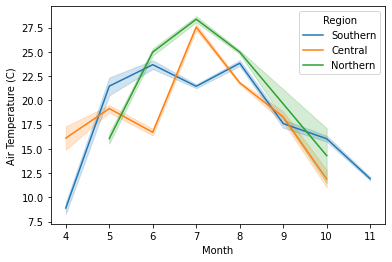

In [ ]:
frame1 = frame[['Month', 'Air Temperature (C)', 'Region']]
sns.lineplot(x="Month", y="Air Temperature (C)", hue="Region",  data=frame1)
#3E)

In [ ]:
asdf = frame.groupby(['Species', 'Region'])[['Number Captured']].count().sort_values(by='Number Captured', ascending = False)
asdf.head(17)
#3F) Look at table for answer.

,,Number Captured
Species,Region,
Lepomis macrochirus,Central,418.0
Lepomis gibbosus,Central,340.0
Micropterus salmoides,Central,307.0
Lepomis gibbosus,Northern,214.0
Lepomis macrochirus,Northern,189.0
Neogobius melanostomus,Central,162.0
Fundulus diaphanus,Central,159.0
Notropis heterodon,Central,155.0
Micropterus salmoides,Northern,152.0


In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

qwer = frame.groupby(['Species', 'Region']).agg({'Minimum (mm)':'min', 'Maximum (mm)':['max', peak_to_peak]}).sort_values(by=[('Maximum (mm)', 'peak_to_peak')], ascending=False)
qwer.head(15)
#3G) The region with the largest range is Southern.

Minimum (mm) Maximum (mm)             
                                          min          max peak_to_peak
Species                 Region                                         
Esox masquinongy        Southern         77.0       1130.0       1053.0
Cyprinus carpio         Southern         36.0        844.0        795.0
                        Central          71.0        785.0        714.0
Ictiobus sp             Southern         23.0        692.0        646.0
Esox lucius             Southern        105.0        750.0        645.0
Cyprinus carpio         Northern        102.0        760.0        584.0
Lepisosteus oculatus    Southern         85.0        714.0        580.0
Moxostoma valenciennesi Northern         59.0        615.0        556.0
Moxostoma anisurum      Southern         69.0        591.0        509.0
Ictalurus punctatus     Northern         12.0        525.0        502.0
                        Southern         28.0        520.0        490.0
Carassius auratus       Southern         21.0        520.0        490.0
Lepisosteus osseus      Central         145.0        630.0        485.0
                        Southern        417.0        999.0        438.0
Micropterus dolomieu    Northern         18.0        455.0        437.0

In [ ]:
q = pd.read_csv('Real GDP.csv', header=None)
w = pd.read_csv('Surplus.csv', header=None)
e = pd.read_csv('Compensation.csv')

q.columns = q.iloc[0] 

q = q[1:]
q=q.melt(['GeoName'], [1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0], var_name='Year')
q.rename(columns={'value':'GDP'}, inplace=True)
q

,GeoName,Year,GDP
0,Alabama,1997,144501.2
1,Alaska,1997,42211.3
2,Arizona,1997,168408.8
3,Arkansas,1997,82571.3
4,California,1997,1378276.5
5,Colorado,1997,184185.3
6,Connecticut,1997,190518.9
7,Delaware,1997,45980.1
8,District of Columbia,1997,79827.7
9,Florida,1997,559805.3


In [ ]:
w = pd.read_csv('Surplus.csv', header=None)
w.columns = w.iloc[0] 

w = w[1:]

w=w.melt(['Year'], ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
                  'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
                  'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
                  'West Virginia', 'Wisconsin', 'Wyoming'], var_name='GeoName')
w['Year'] = pd.to_numeric(w['Year'])
w.rename(columns={'value':'Surplus'}, inplace=True)
w

,Year,GeoName,Surplus
0,1997,Alabama,37247.9
1,1998,Alabama,39368.1
2,1999,Alabama,41513.7
3,2000,Alabama,42583.4
4,2001,Alabama,43348.6
...,...,...,...
1219,2016,Wyoming,15164.9
1220,2017,Wyoming,15976.4
1221,2018,Wyoming,17122.3
1222,2019,Wyoming,16978.8


In [ ]:
e = pd.read_csv('Compensation.csv')
e=e.pivot(index=['Year', 'GeoName'], columns='Description', values='value').reset_index()
e

Description,Year,GeoName,Chain-type quantity indexes for real GDP,Compensation (millions of dollars)
0,1997,Alabama,76.356,61083.8
1,1997,Alaska,72.424,12347.8
2,1997,Arizona,62.043,69876.9
3,1997,Arkansas,76.108,32715.5
4,1997,California,65.225,574432.9
...,...,...,...,...
1219,2020,Virginia,106.243,327867.2
1220,2020,Washington,133.039,326111.4
1221,2020,West Virginia,99.132,40948.0
1222,2020,Wisconsin,105.272,197578.0


In [ ]:
new2 = pd.merge(w, e, left_on=['Year', 'GeoName'], right_on=['Year', 'GeoName'])
new_df = pd.merge(new2, q, left_on=['Year', 'GeoName'], right_on=['Year', 'GeoName'])
new_df
#4A)

,Year,GeoName,Surplus,Chain-type quantity indexes for real GDP,Compensation (millions of dollars),GDP
0,1997,Alabama,37247.9,76.356,61083.8,144501.2
1,1998,Alabama,39368.1,79.034,64168.6,149568.2
2,1999,Alabama,41513.7,81.851,67225.1,154900.2
3,2000,Alabama,42583.4,83.078,69764.4,157221.3
4,2001,Alabama,43348.6,82.883,72038.4,156853.2
...,...,...,...,...,...,...
1219,2016,Wyoming,15164.9,98.284,17265.3,38188.7
1220,2017,Wyoming,15976.4,96.329,17661.5,37429.1
1221,2018,Wyoming,17122.3,97.767,18518.5,37987.9
1222,2019,Wyoming,16978.8,99.416,19245.8,38628.4


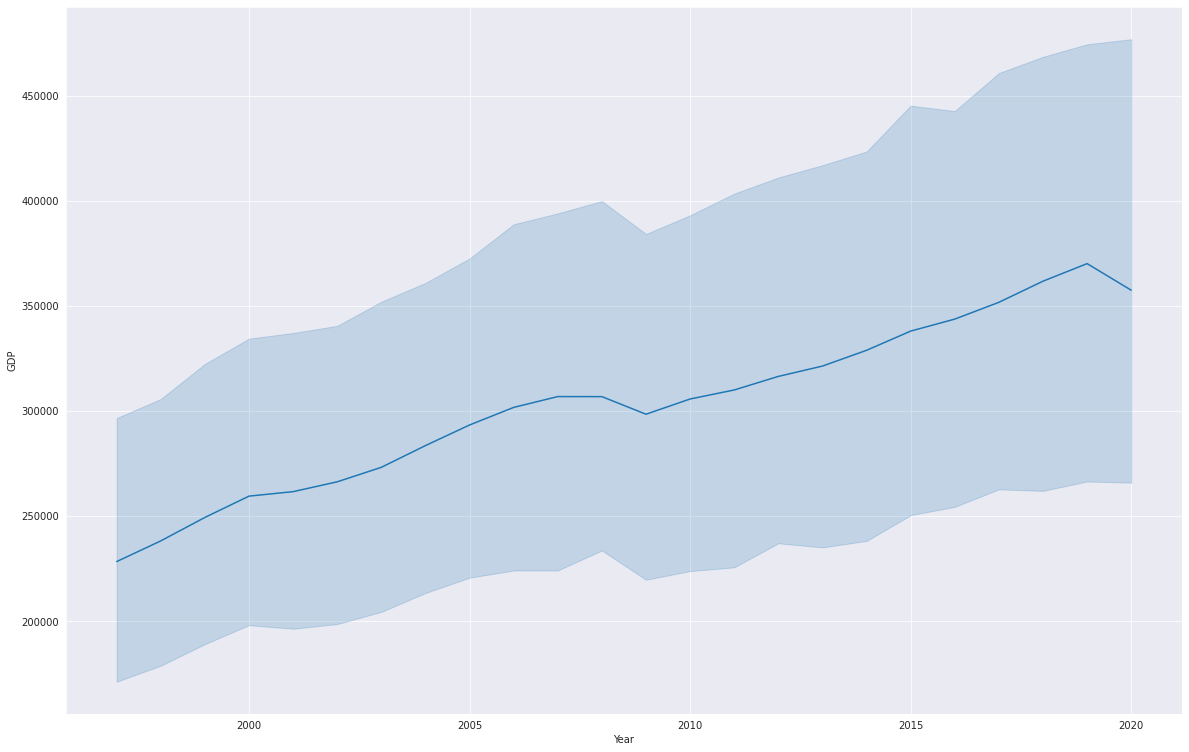

In [ ]:
sns.set_style("darkgrid")
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,13
sns.lineplot(x='Year', y='GDP', data=new_df, ci=90)
plt.show()


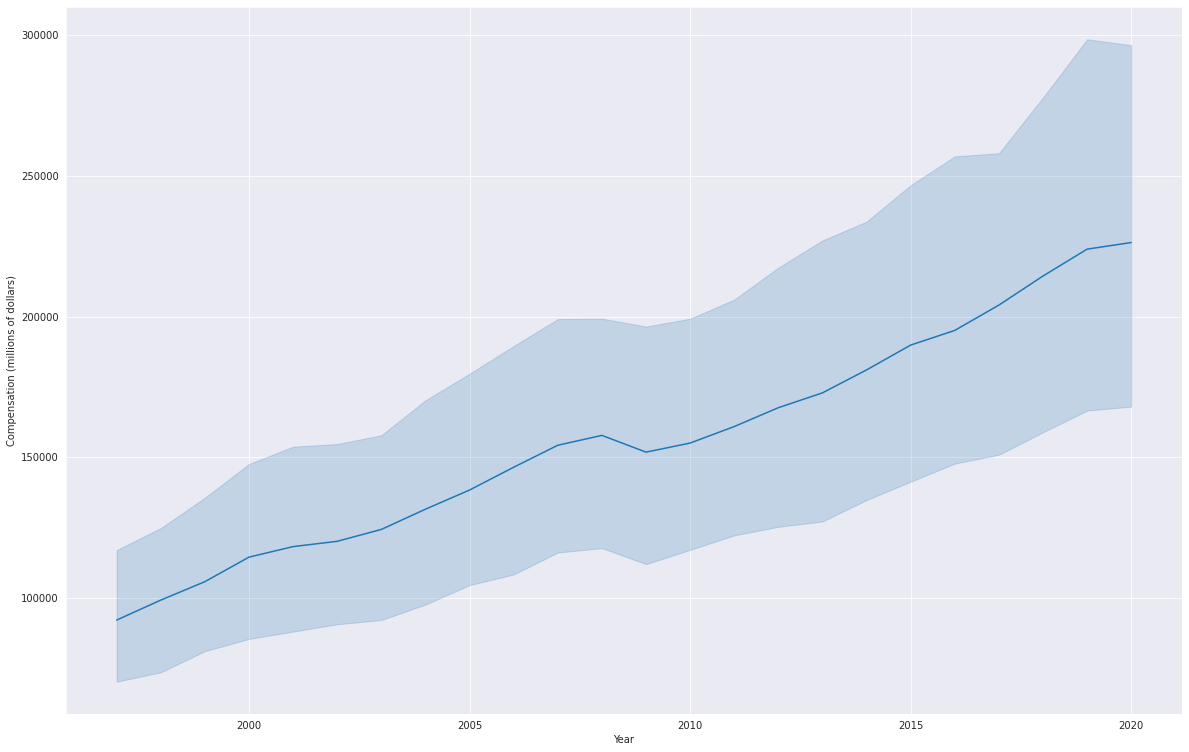

In [ ]:
sns.lineplot(x='Year', y='Compensation (millions of dollars)', data=new_df, ci=90)
plt.show()

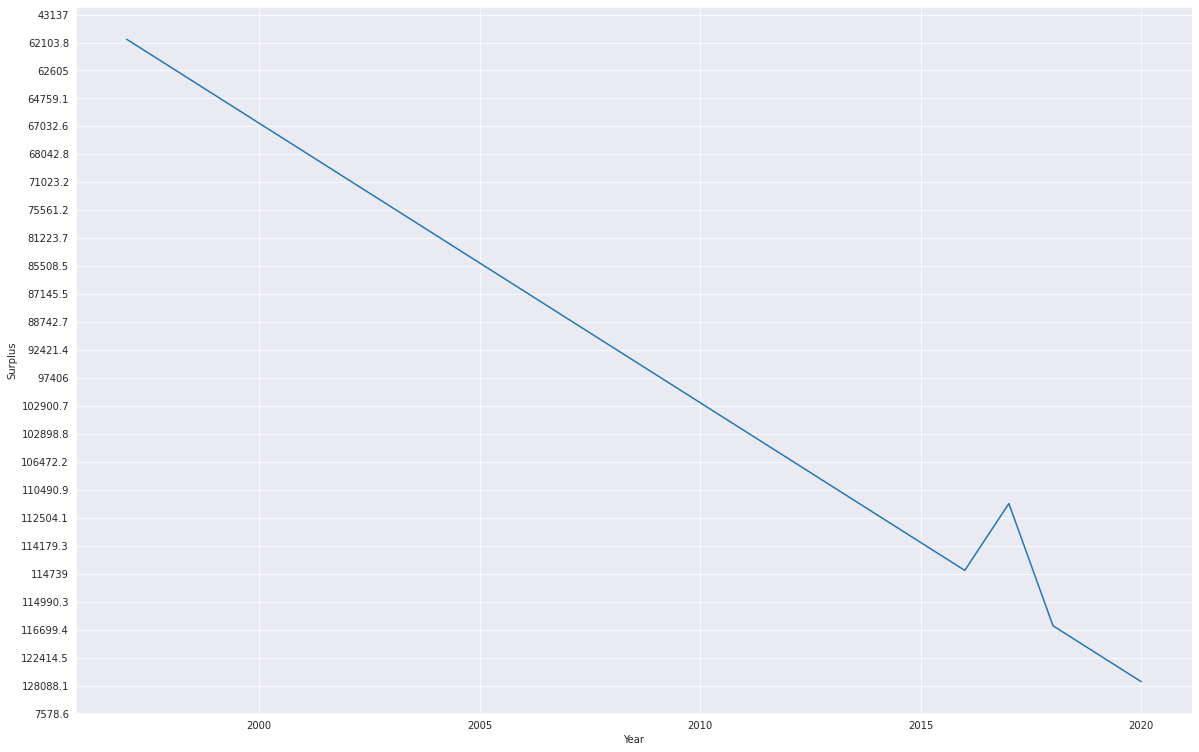

In [ ]:
sns.lineplot(x='Year', y='Surplus', data=new_df, ci=None)
plt.show()
#4B)I - GDP increases over the years, drops around 2008/2009, and again in 2020
#II - Compensation increases steadily, drops around 2008/2009, and starts to flatten in 2020
#III - My surplus graph is really messed up, but it seems like it was constantly decreasing, except for an upward spike in 2016,2017

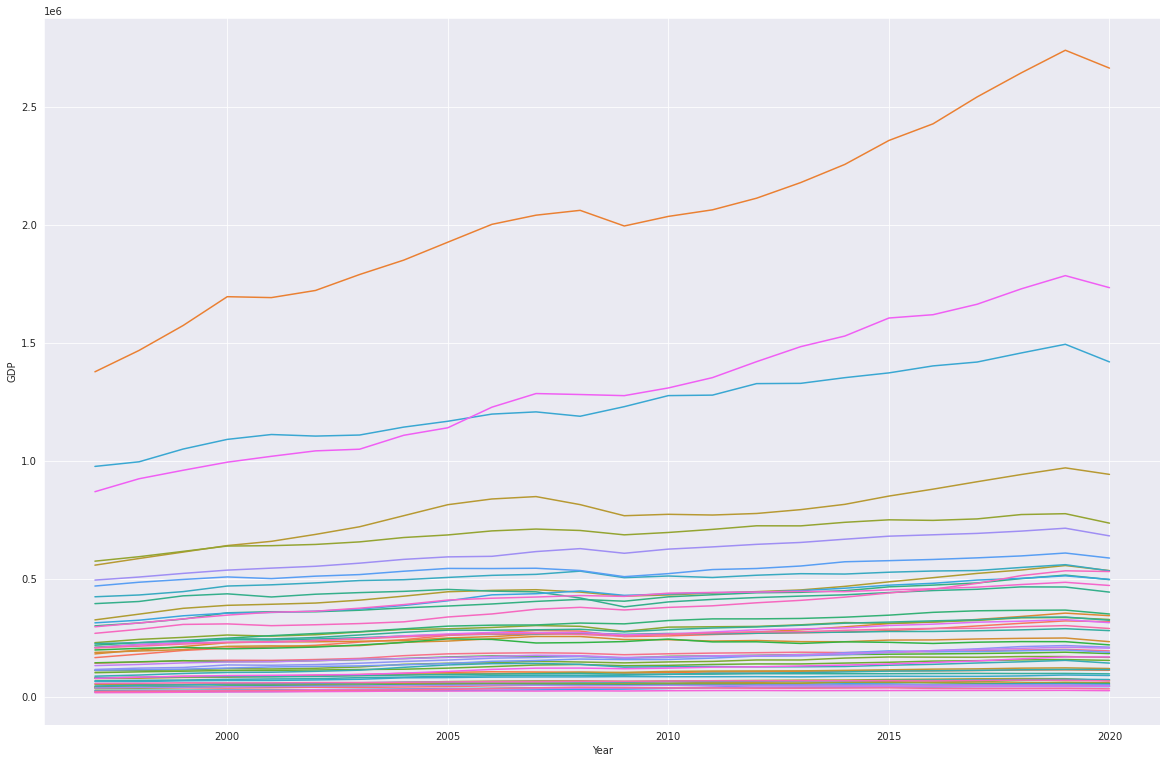

In [ ]:
sns.lineplot(x='Year', y='GDP', hue = 'GeoName', data=new_df, ci=None, legend=None)
plt.show()

In [ ]:
keke = new_df.sort_values(by='Year', ascending=False).head(102)
keke = keke[['Year', 'GDP', 'GeoName']]
keke
#4C)

,Year,GDP,GeoName
1223,2020,36256.7,Wyoming
647,2020,46158.1,Montana
335,2020,737643.6,Illinois
479,2020,58757.3,Maine
1031,2020,316325.3,Tennessee
71,2020,320550.6,Arizona
695,2020,145219.1,Nevada
863,2020,589897.7,Ohio
887,2020,190893.8,Oklahoma
311,2020,73655.4,Idaho


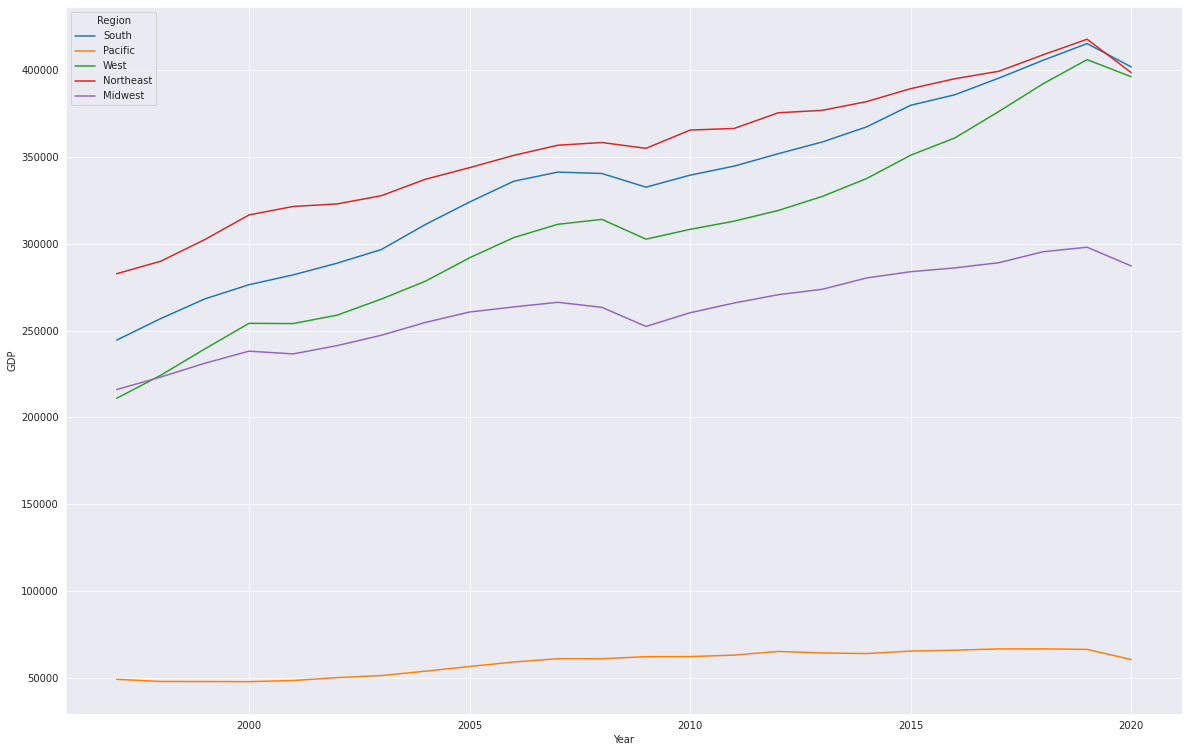

In [ ]:
ff = pd.read_csv('State_region_mapping.csv')
ffPLS = pd.merge(new_df, ff, left_on='GeoName', right_on='State', how='outer').drop('State', axis=1)
sns.lineplot(x='Year', y='GDP', hue='Region', data=ffPLS, ci=None)
#4D)The Midwest and the West have the least GDP growth of the regions

In [ ]:
def func(arr):
  return((arr/arr.sum())*100)


tree = ffPLS.groupby(['Region', 'GeoName', ffPLS['Year']==2020]).agg({'GDP': ['sum']}).sort_values(by='Year', ascending=False)
tree.sort_values(by='Region')
tree.columns = tree.columns.droplevel()
tree

sum
Region    GeoName              Year             
South     Delaware             True      62056.2
          District of Columbia True     122342.1
          North Carolina       True     499517.5
          Mississippi          True      99667.5
          Maryland             True     353052.5
          Louisiana            True     222296.8
          Georgia              True     536693.0
          Florida              True     944000.8
Midwest   Illinois             True     737643.6
Northeast New Jersey           True     535794.9
South     Alabama              True     196906.1
Pacific   Hawaii               True      70625.2
          Alaska               True      50161.0
Northeast Vermont              True      28648.5
          Rhode Island         True      51415.1
          Pennsylvania         True     683773.9
South     Oklahoma             True     190893.8
          South Carolina       True     208480.5
          Tennessee            True     316325.3
          Texas                True    1734321.1
          Virginia             True     473817.5
          West Virginia        True      69711.6
West      Arizona              True     320550.6
          Arkansas             True     114943.5
          California           True    2663665.9
          Colorado             True     346011.3
          Idaho                True      73655.4
          Montana              True      46158.1
          Nevada               True     145219.1
          New Mexico           True      92696.5
          Oregon               True     212849.7
          Utah                 True     171370.1
          Washington           True     532861.9
Northeast New York             True    1420141.0
West      Wyoming              True      36256.7
Midwest   Iowa                 True     169420.3
Northeast Maine                True      58757.3
Midwest   South Dakota         True      46682.7
          Ohio                 True     589897.7
          Missouri             True     282654.2
          Wisconsin            True     291715.8
          Kansas               True     156770.1
          Michigan             True     445682.6
Northeast Connecticut          True     235888.6
Midwest   North Dakota         True      54581.1
          Kentucky             True     185535.1
          Minnesota            True     326635.6
          Indiana              True     329863.3
Northeast Massachusetts        True     498577.0
Midwest   Nebraska             True     117664.9
Northeast New Hampshire        True      75543.1
Midwest   Minnesota            False   6527064.0
          Michigan             False   9977765.7
West      Arizona              False   5891019.5
          Arkansas             False   2375462.7
South     West Virginia        False   1539234.4
West      California           False  46559044.4
Midwest   Missouri             False   6065105.8
Northeast New Jersey           False  11618486.2
West      Montana              False    891794.2
          Colorado             False   6154430.0
          Idaho                False   1287558.8
Midwest   Kentucky             False   3921266.0
West      Nevada               False   2924187.8
Midwest   Kansas               False   3052263.7
West      New Mexico           False   1906415.5
          Oregon               False   3814037.4
Midwest   Iowa                 False   3362327.1
West      Utah                 False   2765014.4
          Washington           False   8680855.1
Midwest   Indiana              False   6712089.8
West      Wyoming              False    811885.3
South     Virginia             False   9481842.8
          South Carolina       False   3974268.3
          Texas                False  29696883.4
Midwest   Nebraska             False   2171568.7
Northeast Pennsylvania         False  14097708.2
          New Hampshire        False   1497424.5
          Rhode Island         False   1141207.8
          Vermont              False    614007.9
          Massachusetts    

In [ ]:
death = tree.groupby('Region')[['sum']].sum()
tree.loc['West']
print((589897.7/81724683.4)*100,
(1420141.0/76891026.2)*100,
(70625.0/2807055.9)*100,
(1734321.1/120710800.2)*100,  
(2663665.9/88817943.9)*100)

#4E) Ohio for midwest, New York for north east, hawaii for pacific, texas for south, california for west
#Percentages: 0.7218109333171181%, 1.84695285026642%, 2.515981245688766%, 1.4367571891881137%, 2.9990177469082346%, respectively.

0.7218109333171181 1.84695285026642 2.515981245688766 1.4367571891881137 2.9990177469082346
